In [1]:
import matplotlib.pyplot as plt
import numpy
import scienceplots
from h5py import File

import plt_utils


%load_ext autoreload
%autoreload 2

In [12]:
with File("/mnt/extraspace/rstiskalek/csiborg_postprocessing/ACL/BORG2_0.25.hdf5", 'r') as f:
    voxel_acl = f['voxel_acl'][...].flatten()
    voxel_dist = f['voxel_dist'][...].flatten()

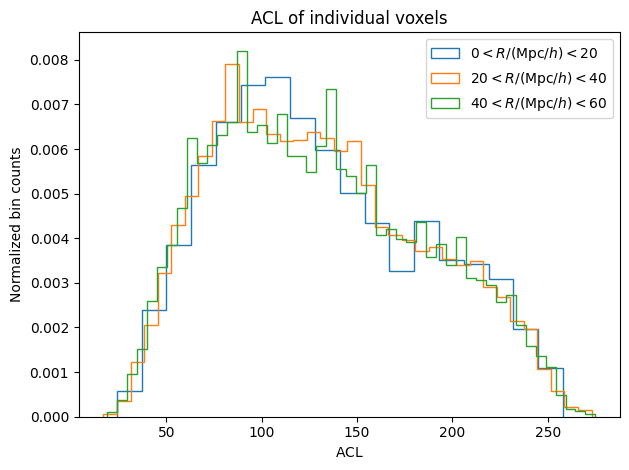

In [28]:
bins = numpy.linspace(0, 100, 10)


plt.figure()

mask = voxel_dist < 20
plt.hist(voxel_acl[mask], bins="auto", histtype='step', density=1, label=r"$0 < R / (\mathrm{Mpc} / h)  < 20$")

mask = (voxel_dist > 20) & (voxel_dist < 40)
plt.hist(voxel_acl[mask], bins="auto", histtype='step', density=1, label=r"$20 < R / (\mathrm{Mpc} / h)  < 40$")

mask = (voxel_dist > 40) & (voxel_dist < 60)
plt.hist(voxel_acl[mask], bins="auto", histtype='step', density=1, label=r"$40 < R / (\mathrm{Mpc} / h)  < 60$")

# plt.scatter(voxel_dist.flatten(), voxel_acl.flatten(), s=0.1)
plt.legend()
plt.title("ACL of individual voxels")
plt.xlabel(r"$\mathrm{ACL}$")
plt.ylabel(r"Normalized bin counts")

plt.tight_layout()
plt.savefig("../plots/BORG_Stephen_ACL.png", dpi=450)
plt.show()